In [45]:
using LinearAlgebra
using PyCall
using PyPlot
using LaTeXStrings


In [2]:
pygui(true)

true

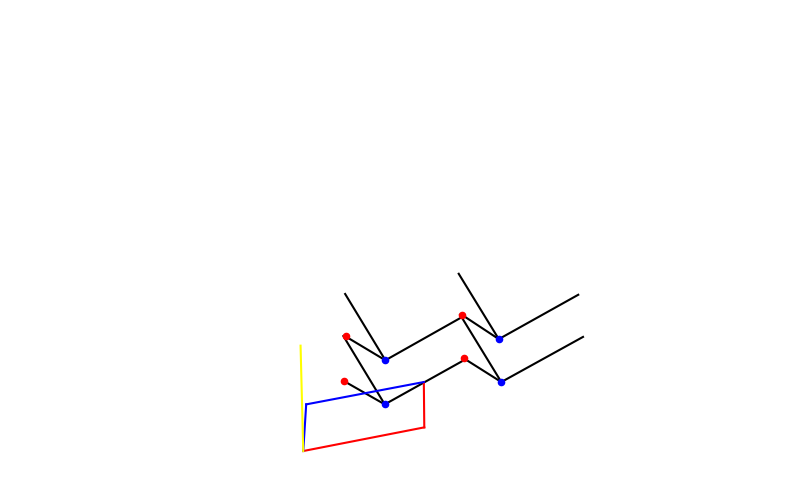

PyObject Text(0.5, 0, 'z')

In [2]:
#Todas las unidades de distancia son Armstrongs
a=3.86; #Parámetro de red es de la literatura (Zolyomi)
a1 = a*[sqrt(3)/2,3/2,0];
a2 = a*[-sqrt(3)/2,3/2,0];
a3 = a*[0,0,1/a];

si1=zeros(3);
si2=zeros(3);
sil2=zeros(3);




s1=(1/3)*a1+(1/3)*a2+0.45*a3; #El 0.45 también es de la literatura, separación vertical entre átomos 1 y 2
s2=(2/3)*a1+(2/3)*a2 ;
  
  

for i=0:1
  for j=0:1
    for h=0:0
      ki=i*a1+j*a2+h*a3; #Genero los puntos de la red     
       
          #Aquí tomo los puntos de la red y le sumo las coordenadas de cada silicio       
          scatter3D(ki[1]+s1[1],ki[2]+s1[2],ki[3]+s1[3], color="red")   
            si1[1]=ki[1]+s1[1];
            si1[2]=ki[2]+s1[2];
            si1[3]=ki[3]+s1[3];   
            
            
            scatter3D(ki[1]+s2[1],ki[2]+s2[2],ki[3], color="blue")
            
            si2[1]=ki[1]+s2[1];
            si2[2]=ki[2]+s2[2];
            si2[3]=ki[3]+s2[3];
            sil2[1]=ki[1]-s2[1];
            sil2[2]=ki[2];
            sil2[3]=ki[3]+s2[3];
            
            plot3D([si1[1],si2[1]],[si1[2],si2[2]],[si1[3],si2[3]],"k")
                        
         plot3D([si2[1],ki[1]+0.9*s1[2]], [si2[2],ki[2]+2.5*s1[2]], [si2[3],ki[3]+s1[3]],"k")    
        plot3D([si2[1],(ki[1]-0.9*s1[2])], [si2[2],(ki[2]+2.5*s1[2])], [si2[3],(ki[3]+s1[3])],"k")      
          #scatter3D(ki[1],ki[2],ki[3],color="yellow")  
            end#h
        end#j
    end#i

plot3D([0,a1[1]],[0,a1[2]],[0,a1[3]], color="red")
plot3D([0,a2[1]],[0,a2[2]],[0,a2[3]], color="blue")
plot3D([0,a3[1]],[0,a3[2]],[0,a3[3]], color="yellow")

plot3D([a1[1],a1[1]+a2[1]],[a1[2],a1[2]+a2[2]],[a1[3],a1[3]+a2[3]], color="red")
plot3D([a2[1],a1[1]+a2[1]],[a2[2],a1[2]+a2[2]],[a2[3],a1[3]+a2[3]], color="blue")



PyPlot.xlim([-10,10])
PyPlot.ylim([0,20])
PyPlot.zlim([0.5,2.5]) 


fig4 = plt.gcf();
fig4.set_size_inches(10,6);
plt.axis("off")
plt.grid(b="None")
PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.zlabel("z")

In [52]:


 scatter3D(s1[1],s1[2],s1[3], color="red")   
scatter3D(s2[1],s2[2],0, color="blue")
plot3D([0,a1[1]],[0,a1[2]],[0,a1[3]], color="red")
plot3D([0,a2[1]],[0,a2[2]],[0,a2[3]], color="blue")
plot3D([0,a3[1]],[0,a3[2]],[0,a3[3]], color="yellow")

plot3D([a1[1],a1[1]+a2[1]],[a1[2],a1[2]+a2[2]],[a1[3],a1[3]+a2[3]], color="red")
plot3D([a2[1],a1[1]+a2[1]],[a2[2],a1[2]+a2[2]],[a2[3],a1[3]+a2[3]], color="blue")
PyPlot.xlabel(L"x [A]")
PyPlot.ylabel(L"y [A]")
PyPlot.zlabel(L"z [A]")
title("Celda unitaria")

PyObject Text(0.5, 0.92, 'Celda unitaria')

In [3]:
b1=2pi*cross(a2,a3)/dot(a1,cross(a2,a3)); #Vectores de la red recíproca
b2=2pi*cross(a3,a1)/dot(a1,cross(a2,a3));
b3=2pi*cross(a1,a2)/dot(a1,cross(a2,a3));

function G(i,j,h)
    
    G=i*b1+j*b2+h*b3;
    
    return G
end

G (generic function with 1 method)

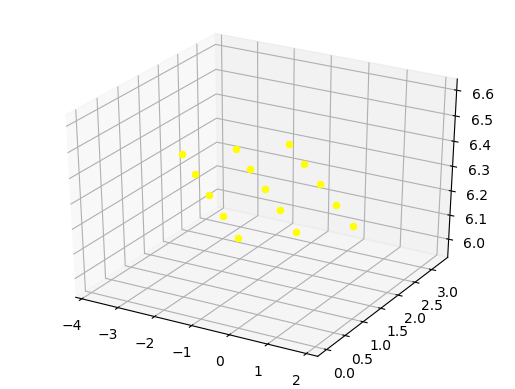

In [4]:

for i=0:2
  for j=0:4
    for h=1:1
      Gr=G(i,j,h); #Genero los puntos de la red recíproca  
       
         
          scatter3D(Gr[1],Gr[2],Gr[3],color="yellow")  
            end#h
        end#j
    end#i


In [68]:
function k(i,j,h)
    
    k=i*a1+j*a2+h*a3;
    
    return k
end

k (generic function with 1 method)

In [69]:
#Aquí grafico la zona de Brillouin (café) del siliceno y la trayectoria (verde) para el cálculo de amarre fuerte

scatter(G(0,0,0)[1],G(0,0,0)[2],color=:cyan)
scatter(G(1,1,1)[1],G(1,1,1)[2],color=:red)#centro
scatter(G(1,0,0)[1],G(1,0,0)[2],color=:orange)
scatter(G(0,1,0)[1],G(0,1,0)[2],color=:purple)
scatter(G(0,-1,0)[1],G(0,-1,0)[2],color=:green)

scatter(G(-1,-1,-1)[1],G(-1,-1,-1)[2],color=:yellow)

scatter(G(-1,0,0)[1],G(-1,0,0)[2],color=:pink)
#=
Puntos medios
scatter(G(-1,0,0)[1]/2,G(-1,0,0)[2]/2,color=:black)
scatter(G(-1,-1,-1)[1]/2,G(-1,-1,-1)[2]/2,color=:black)
scatter(G(0,-1,0)[1]/2,G(0,-1,0)[2]/2,color=:black)
scatter(G(0,1,0)[1]/2,G(0,1,0)[2]/2,color=:black)
scatter(G(1,0,0)[1]/2,G(1,0,0)[2]/2,color=:black)
scatter(G(1,1,1)[1]/2,G(1,1,1)[2]/2,color=:black) =#

#=Rectas
λ=0:0.1:1;
λ2=-1:0.1:0;

x1=[pi/(a*sqrt(3))-l*pi/3a for l in λ2];
y1=[pi/3a+l*pi/(a*sqrt(3)) for l in λ2];

x2=[pi/(a*sqrt(3))+l*pi/3a for l in λ];
y2=[-pi/3a+l*pi/(a*sqrt(3)) for l in λ];

plot(x1,y1)
plot(x2,y2)=#



plot([0,4pi/(a*3*sqrt(3))],[0,0],color=:"#2EFE2E")
plot([0,G(0,-1,0)[1]/2],[0,G(0,-1,0)[2]/2],color=:"#2EFE2E")
plot([4pi/(a*3*sqrt(3)),G(0,-1,0)[1]/2],[0,G(0,-1,0)[2]/2],color=:"#2EFE2E")

scatter(4pi/(a*3*sqrt(3)),0,color=:red)
scatter(2pi/(a*3*sqrt(3)),2pi/3a,color=:red)
scatter(-2pi/(a*3*sqrt(3)),2pi/3a,color=:red)
scatter(-4pi/(a*3*sqrt(3)),0,color=:red)
scatter(2pi/(a*3*sqrt(3)),-2pi/3a,color=:red)
scatter(-2pi/(a*3*sqrt(3)),-2pi/3a,color=:red)

plot([4pi/(a*3*sqrt(3)),2pi/(a*3*sqrt(3))],[0,2pi/3a],color=:"#8A2908")

plot([2pi/(a*3*sqrt(3)),-2pi/(a*3*sqrt(3))],[2pi/3a,2pi/3a],color=:"#8A2908")
plot([-2pi/(a*3*sqrt(3)),-4pi/(a*3*sqrt(3))],[2pi/3a,0],color=:"#8A2908")
plot([-4pi/(a*3*sqrt(3)),-2pi/(a*3*sqrt(3))],[0,-2pi/3a],color=:"#8A2908")
plot([-2pi/(a*3*sqrt(3)),2pi/(a*3*sqrt(3))],[-2pi/3a,-2pi/3a],color=:"#8A2908")
plot([2pi/(a*3*sqrt(3)),G(0,-1,0)[1]/2],[-2pi/3a,G(0,-1,0)[2]/2],color=:"#8A2908")

plot([0,G(1,0,0)[1]],[0,G(1,0,0)[2]],color=:"#000000")

plot([0,G(0,1,0)[1]],[0,G(0,1,0)[2]],color=:"#000000")

title("Zona de Brillouin de Siliceno")
xlim([-1,1])
ylim([-1,1])
annotate("Γ",(0,0.04))
annotate("K",(4pi/(a*3*sqrt(3)),0.04))
annotate("M",(G(0,-1,0)[1]/2,G(0,-1,0)[2]/2))

zb2=plt.gcf();

zb2.savefig("zb.png", dpi=100)

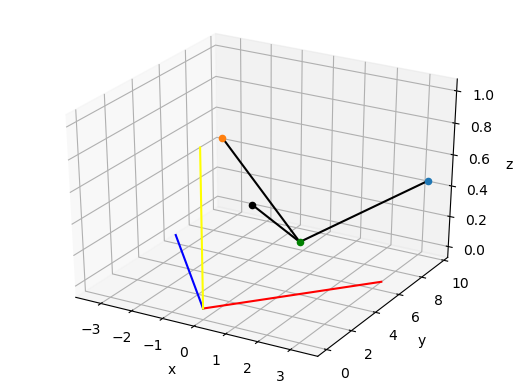

In [89]:

#Aquí ploteo el átomo 2 que usaremos como referencia para el amarre fuerte y sus vecinos


plot3D([0,a1[1]],[0,a1[2]],[0,a1[3]], color="red")
plot3D([0,a2[1]],[0,a2[2]],[0,a2[3]], color="blue")
plot3D([0,a3[1]],[0,a3[2]],[0,a3[3]], color="yellow")

scatter3D(s1[1],s1[2],s1[3],color="black") #El átomo 1 es un vecino del segundo
scatter3D(s2[1],s2[2],s2[3],color="green") #Este es el átomo 2
scatter3D(k(1,0,0)[1]+s1[1],k(1,0,0)[2]+s1[2],k(1,0,0)[3]+s1[3]) #Otro vecino
scatter3D(k(0,1,0)[1]+s1[1],k(0,1,0)[2]+s1[2],k(0,1,0)[3]+s1[3]) #Otro vecino (Son tres vecinos)

plot3D([s2[1],s1[1]],[s2[2],s1[2]],[s2[3],s1[3]], color="black") #Lineas que unen S2 con sus vecinos
plot3D([s2[1],k(1,0,0)[1]+s1[1]],[s2[2],k(1,0,0)[2]+s1[2]],[s2[3],k(1,0,0)[3]+s1[3]], color="black")
plot3D([s2[1],k(0,1,0)[1]+s1[1]],[s2[2],k(0,1,0)[2]+s1[2]],[s2[3],k(0,1,0)[3]+s1[3]], color="black")

PyPlot.xlabel("x")
PyPlot.ylabel("y")
PyPlot.zlabel("z")


vec=plt.gcf();

vec.savefig("vec.png", dpi=100)

# Amarre fuerte

In [69]:
#{S,P_x,P_y,P_z}
ε_s=-2.15#eV #Energía del orbital s, también de la literatura. https://link.springer.com/article/10.1134/S1063776115060072
ε_x=4.86
ε_y=4.86
ε_z=1.96#eV 
V_ssσ=-1.94#eV
V_spσ=2.78#eV
V_ppσ=4.47#eV
V_ppπ=-1.59#eV




-1.59

In [70]:
#Base cartesiana

xu=[1,0,0];
yu=[0,1,0];
zu=[0,0,1];
e=[xu,yu,zu];

#Eelementos de la red
a=3.86;
a1 = a*[sqrt(3)/2,3/2,0];
a2 = a*[-sqrt(3)/2,3/2,0];
a3 = a*[0,0,1/a];

#Base atómica


s1=(1/3)*a1+(1/3)*a2+0.45*a3; #Los expreso como combinacion lineal de los de la red
s2=(2/3)*a1+(2/3)*a2 ;

In [71]:


#Primeros vecinos y vectores unitarios

δ21=-(s1-s2);
δ22=-(k(1,0,0)+s1-s2);
δ23=-(k(0,1,0)+s1-s2);

δ21u=δ21/norm(δ21);
δ22u=δ22/norm(δ22);
δ23u=δ23/norm(δ23);

#Aprovechando la hermiticidad de la matriz, sólo se usaron los vecinos de s2 y se calculó la otra parte de la matriz conjugando


#Para s1 #Ignoremos estos, no los usamos y son del cálculo de silicio, no de siliceno
###########################################
δ11=-s2-s1;
δ12=-a1-s1;
δ13=-a2-s1;
δ14=-a3-s1;

δ11u=δ11/norm(δ11);
δ12u=δ12/norm(δ12);
δ13u=δ13/norm(δ13);
δ14u=δ14/norm(δ14);



δ1=[δ11,δ12,δ13]
δ1u=[δ11u,δ12u,δ13u]
#########################################33

δ2=[δ21,δ22,δ23] #Conjunto de vecinos de S2, los uso para la función que te arroja los vecinos

δ2u=[δ21u,δ22u,δ23u] #Vectores unitarios de los vecinos

δu=[δ1u,δ2u]
δ=[δ1,δ2]

ε=[ε_s,ε_x,ε_y,ε_z]; #Arreglo de las energías que uso para la diagonal


In [72]:
function δk(i,j) #Delta de kronecker
   if i==j
        
        1
    else
        0
    end
end;

In [73]:
function Cosdir(a)
if a!=[0,0,0]
        
  au=a/norm(a);
    else
       au= [0,0,0];
    end
l=au'xu;
m=au'yu;
n=au'zu;
    
    return [1,l,m,n] 
        
    
end;

In [74]:
function c(t,p,a) #Función sierra para indexar las interacciones con los indices de la matriz
    
    return trunc(Int,-2*a/pi *atan(cot( (t+0.01-1)*pi/p )) +3)
    end;

at=[1,1,1,1,2,2,2,2]; #Las primeras cuatro indican el átomo 1 y las otras cuatro son el átomo 2

In [75]:
function Vec(α,β,γ) #Función que arroja el γ-ésimo átomo vecino de β, de acuerdo a la interacción del átomo α,
    
    if α==1 && β==2
        return δ2[γ]
    elseif α==2 && β==1
        return δ2[γ] #Puse también aquí a los vecinos de S2 para aprovechar que la matriz es hermitiana
    else 
        return [0,0,0]
    end
    
end    

Vec (generic function with 1 method)

In [76]:
#NOTA, a cada orbital se le asignó un número: s -> 1, p_x -> 2, p_y -> 3, p_z -> 4
function t(s,p,a) #Función que nos da el parámetro de interacción entre los orbitales para un vector "a"
    
    if s==p && s==1 #Interacción entre orbitales s-s
        return V_ssσ
    elseif s==p # Interacción de orbitales iguales
        return Cosdir(a)[s]^2*V_ppσ+(1-Cosdir(a)[s]^2)*V_ppπ
        
    elseif s==1 && p!=1  #Interacción de un orbital s con cualquier otro que no sea s
          
            return Cosdir(a)[p]*V_spσ
    elseif s!=1 && p==1
            return Cosdir(-a)[s]*V_spσ
        
       
    elseif s==2 && p==3 || s==3 && p==2 #Combinaciones de interacciones entre diferentes orbitales p
        return Cosdir(a)[2]*Cosdir(a)[3]*(V_ppσ-V_ppπ)
    elseif s==2 && p==4 || s==4 && p==2
        return Cosdir(a)[2]*Cosdir(a)[4]*(V_ppσ-V_ppπ)
    elseif s==3 && p==4 || s==4 && p==3
        return Cosdir(a)[3]*Cosdir(a)[4]*(V_ppσ-V_ppπ)
        end
    end;

In [77]:
function Σ(i,j,x,y,z) #Función para hacer la suma de las exponenciales complejas
    q=[x,y,z];
    f=0;  
    ima=1im;
    for w=1:3
        
    f+=exp(-ima*(q'Vec(at[i],at[j],w)))*t(c(i,4,2),c(j,4,2),Vec(at[i],at[j],w)); #Recordemos que c(j,k,l) es la función sierra y at[m] indica el átomo
        
        end#w
    
    
    return f
    end;

In [78]:
#Matriz

x=y=z=1;
M=zeros(Complex{Float64},8,8);
for i=1:8
    for j=1:8
       if j<=i
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,x,y,z)
        else
            M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,-x,-y,-z) #Para llenar las entradas con la parte imaginaria negativa
        end
        
        end #j
    end #i
cd=Adjoint(LowerTriangular(M))
cb=Hermitian(cd)
eigvals(cb+zeros(8,8))
#display(cb+zeros(8,8))
#display(conj!(permutedims(M, [2,1]))-M) #Para probar que la matriz es hermitiana se muestra la resta entre ella y su compleja conjugada
cb-adjoint(cb)

8×8 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im

In [79]:

function Ei(x,y,z) #Función que dará las eigenenergías del sistema en el punto (x,y,z) (espacio recíproco)
M=zeros(Complex{Float64},8,8);
for i=1:8
    for j=1:8
       if j<=i
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,x,y,z)
        else
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,-x,-y,-z)
        end
        end #j
    end #i
cd=Adjoint(LowerTriangular(M))
cb=Hermitian(cd)

return eigvals(cb+zeros(8,8)) #Vector de ocho entradas
end

Ei (generic function with 1 method)

In [80]:
#Matriz
function Vi(x,y,z) #Función que dará los eigenvectores del sistema en el punto (x,y,z) (espacio recíproco)
#x=y=z=1;
M=zeros(Complex{Float64},8,8);
for i=1:8
    for j=1:8
       if j<=i
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,x,y,z)
        else
             M[i,j]=δk(i,j)ε[c(i,4,2)]+(1-δk(at[i],at[j]))*Σ(i,j,-x,-y,-z)
        end
        end #j
    end #i
cd=Adjoint(LowerTriangular(M))
cb=Hermitian(cd)

return real.(eigvecs(cb+zeros(8,8))) #Matriz de 8x8
end

Vi (generic function with 1 method)

In [81]:
function Ei1(d,f,g) #Cada una de estas funciones nos da una de las entradas de Ei(x,y,z)
    return Ei(d,f,g)[1]
end

function Ei2(d,f,g)
    return Ei(d,f,g)[2]
end
function Ei3(d,f,g)
    return Ei(d,f,g)[3]
end
function Ei4(d,f,g)
    return Ei(d,f,g)[4]
end
function Ei5(d,f,g)
    return Ei(d,f,g)[5]
end
function Ei6(d,f,g)
    return Ei(d,f,g)[6]
end
function Ei7(d,f,g)
    return Ei(d,f,g)[7]
end

function Ei8(d,f,g)
    return Ei(d,f,g)[8]
end

Ei8 (generic function with 1 method)

In [82]:
#Puntos de alta simetría

Γ=[0,0,0];
K=[4pi/(a*3*sqrt(3)),0,0];
M=(pi/a).*[1/sqrt(3),-1/3,0];

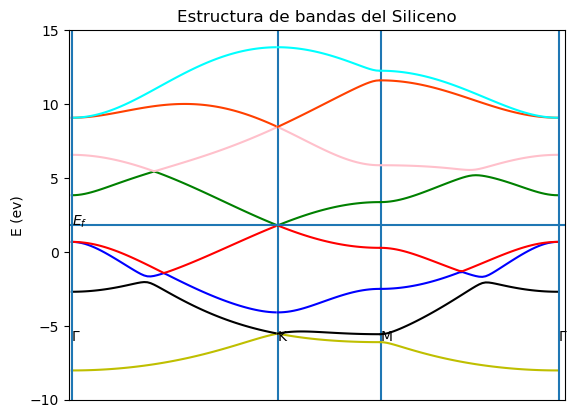

In [18]:
function BANDAS()
ΓK=0:0.01:norm(K-Γ); #Primer trayectoria


h1=Ei1.(ΓK,0,0);
h2=Ei2.(ΓK,0,0);
h3=Ei3.(ΓK,0,0);
h4=Ei4.(ΓK,0,0);
h5=Ei5.(ΓK,0,0);
h6=Ei6.(ΓK,0,0);
h7=Ei7.(ΓK,0,0);
h8=Ei8.(ΓK,0,0);

plot(ΓK,h1,"y")
plot(ΓK,h2,"k")
plot(ΓK,h3,"b")
plot(ΓK,h4,"r")
plot(ΓK,h5,"g")
plot(ΓK,h6,color=:pink)
plot(ΓK,h7,color=:"#FF4000")
plot(ΓK,h8,color=:cyan)
axvline(0) #Linea vertical en el punto Γ (La primera)
annotate("Γ",(0,-6))
axvline(norm(K-Γ)) #Linea vertical en el punto K
annotate("K",(norm(K-Γ),-6))

#########################
KM=norm(K-Γ):0.01:norm(K-Γ)+ norm(K-M); #Segunda trayectoria
km=0:1/(length(KM)-1):1;

xj=zeros(length(km));
yj=zeros(length(km));
for li=1:1:length(km) #Parametrización de la trayectoria (recordar ec. paramétrica de la recta)
 xj[li]=4pi/(3a*sqrt(3))-(sqrt(3)*pi/9a)*km[li];
 yj[li]=-(pi/3a)*km[li];
    end 

i1=Ei1.(xj,yj,0);
i2=Ei2.(xj,yj,0);
i3=Ei3.(xj,yj,0);
i4=Ei4.(xj,yj,0);
i5=Ei5.(xj,yj,0);
i6=Ei6.(xj,yj,0);
i7=Ei7.(xj,yj,0);
i8=Ei8.(xj,yj,0);

plot(KM,i1,"y")
plot(KM,i2,"k")
plot(KM,i3,"b")
plot(KM,i4,"r")
plot(KM,i5,"g")
plot(KM,i6,color=:pink)
plot(KM,i7,color=:"#FF4000")
plot(KM,i8,color=:cyan)
axvline(norm(K-Γ)+ norm(K-M)) #Linea vertical en el punto M
annotate("M",(norm(K-Γ)+ norm(K-M),-6))

####################################

MΓ=norm(K-Γ)+ norm(K-M):0.01:norm(K-Γ)+ norm(K-M)+norm(M-Γ); #Tercer trayectoria
mg=0:1/(length(MΓ)-1):1;

xl=zeros(length(mg));
yl=zeros(length(mg));
for li=1:1:length(mg)
 xl[li]=pi/(a*sqrt(3))-pi/(a*sqrt(3))*mg[li];
 yl[li]=-pi/3a+(pi/3a)mg[li];
    end    

l1=Ei1.(xl,yl,0);
l2=Ei2.(xl,yl,0);
l3=Ei3.(xl,yl,0);
l4=Ei4.(xl,yl,0);
l5=Ei5.(xl,yl,0);
l6=Ei6.(xl,yl,0);
l7=Ei7.(xl,yl,0);
l8=Ei8.(xl,yl,0);

plot(MΓ,l1,"y")
plot(MΓ,l2,"k")
plot(MΓ,l3,"b")
plot(MΓ,l4,"r")
plot(MΓ,l5,"g")
plot(MΓ,l6,color=:pink)
plot(MΓ,l7,color=:"#FF4000")
plot(MΓ,l8,color=:cyan)
axvline(norm(K-Γ)+ norm(K-M)+norm(M-Γ),label="as") #Linea vertical en el punto Γ (la última)
annotate("Γ",(norm(K-Γ)+ norm(K-M)+norm(M-Γ),-6))
PyPlot.tick_params(bottom="off",labelbottom="off")

title("Estructura de bandas del Siliceno")
ylabel("E (ev)")
axhline(Ei5(4pi/(a*3*sqrt(3)),0,0)) #Linea horizontal en el punto K, Energía de Fermi
annotate(L"E_f",(0,Ei5(4pi/(a*3*sqrt(3)),0,0)))
axis([-0.01, 1.5, -10, 15])
#axis([-0.01, 1.5, 1.6, 1.8])
end
BANDAS()

band=plt.gcf();
band.savefig("bandas.png",dpi=100);

## Densidad de estados

In [83]:
lor(x,x0,γ)= (1/1)*(γ^2/((x-x0)^2+γ^2)); #Definición de una lorentziana con parámetro de anchura γ, centrada en el punto x0 y que depende de x

In [84]:
R(n)=[cos(n*pi/3) -sin(n*pi/3);sin(n*pi/3) cos(n*pi/3)]; #Matriz que rotará n veces 60 grados (pi/3 rad) un vector y así abarcar toda la Z.B

###      Esta sección se dedica a parametrizar la zona de Brillouin

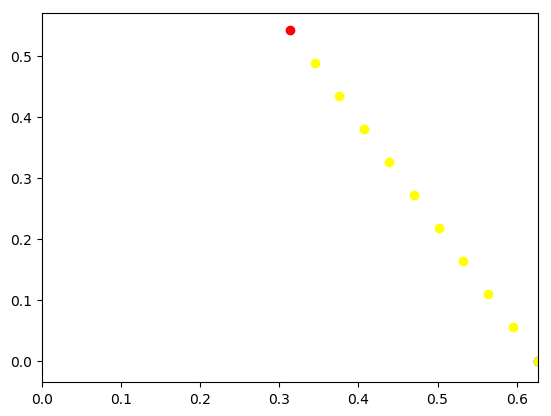

(0.0, 0.6265282778011115)

In [85]:
scatter(4pi/(a*3*sqrt(3)),0,color=:blue) #Puntos que se usaran como referencia para evaluar Ei en la Z.B
scatter(2pi/(a*3*sqrt(3)),2pi/3a,color=:red)

A=[4pi/(a*3*sqrt(3)),0]; 
B=[2pi/(a*3*sqrt(3)),2pi/3a];

λ=0:0.1:1; #Parámetro que se usará para escalar la red que cubrirá la Z.B

xi=zeros(length(λ));
yi=zeros(length(λ));

for li=1:1:length(λ)
 xi[li]=4pi/(a*3*sqrt(3))-2pi/(a*3*sqrt(3))*λ[li]; #Parametrización de una recta entre los puntos de referencia
 yi[li]=2pi/(a*3)*λ[li];
    end  

for li=1:length(λ)-1
    scatter(xi[li],yi[li],color=:yellow) #Gráfica de los puntos
end

xlim([0,4pi/(a*3*sqrt(3))])

In [110]:
λ2=0:1/(25):1;

In [87]:
function rc2(m,i) # i-ésimo punto de la m-ésima recta
 if m==1   
λ=0:1; #Parámetro que se usará para escalar la red que cubrirá la Z.B
    else
        λ=0:1/(m-1):1
    end

xi=zeros(length(λ));
yi=zeros(length(λ));

for li=1:1:length(λ)
 xi[li]=4pi/(a*3*sqrt(3))-2pi/(a*3*sqrt(3))*λ[li]; #Parametrización de una recta entre los puntos de referencia
 yi[li]=2pi/(a*3)*λ[li];
    end  
    
    return [xi[i],yi[i]]
end

function zb(f,h,n) #Puntos de la red en la Z.B
    xzb=rc2(h,f)[1]*λ2[h]; #Se usa el f-ésimo puntos de la recta parametrizada y se escalan sus coordenadas con λ ya que λ va de 0 a 1
    yzb=rc2(h,f)[2]*λ2[h];
    
    fg=R(n)*[xzb,yzb]; #La rotación definirá en qué triángulo del hexágono estará el punto, n va de 0 a 5
   
    return fg
    
end

zb (generic function with 1 method)

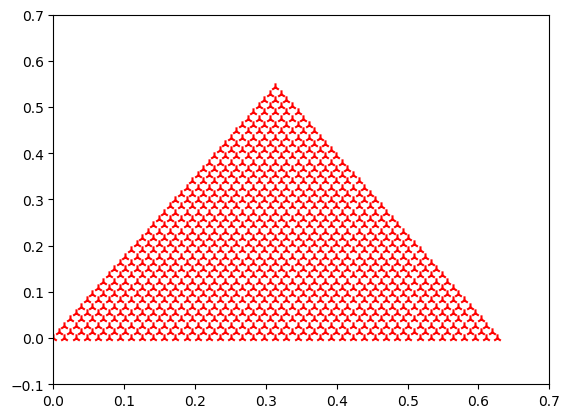

(0, 0.7)

In [88]:
#Se grafica la red para la evauación de Ei


function zb(f,h,n) #Puntos de la red en la Z.B
    xzb=rc2(h,f)[1]*λ2[h]; #Se usa el f-ésimo puntos de la recta parametrizada y se escalan sus coordenadas con λ ya que λ va de 0 a 1
    yzb=rc2(h,f)[2]*λ2[h];
    
    fg=R(n)*[xzb,yzb]; #La rotación definirá en qué triángulo del hexágono estará el punto, n va de 0 a 5
   
    return fg
    
end
#Se grafica la red para la evauación de Ei
for n=0:0 #Puntos en el primer triángulo
for li=1:length(λ2)
    for lo=1:li
        
    scatter(zb(lo,li,n)[1],zb(lo,li,n)[2],color=:red,marker="2") #lo es igual en las dos coordenadas porque el escalamiento es igual
        
    end
end
end

ylim(-0.1,0.7)
xlim(0,0.7)

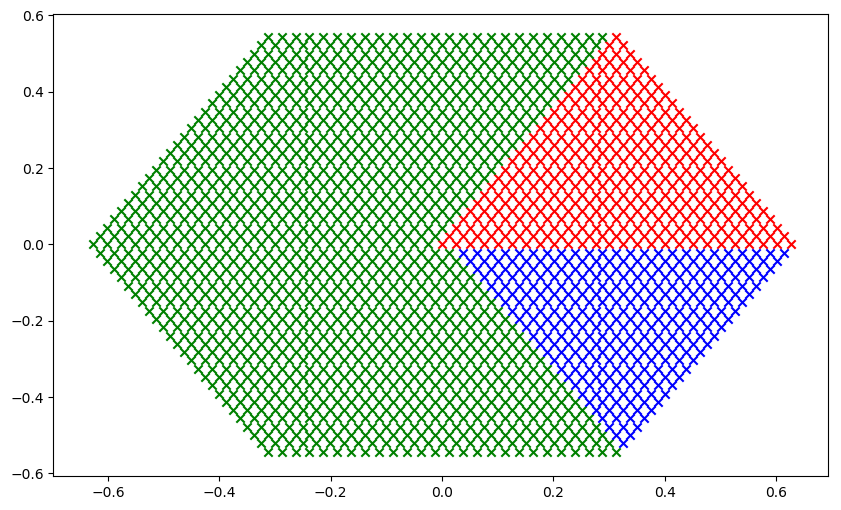

In [28]:
#Se grafica la red para la evauación de Ei
for n=0:0 #Puntos en el primer triángulo
for li=1:length(λ2)
    for lo=1:li
        
    scatter(zb(lo,li,n)[1],zb(lo,li,n)[2],color=:red,marker=:x) #lo es igual en las dos coordenadas porque el escalamiento es igual
        
    end
end
end

for n=1:4 #Puntos del segundo triángulo al quinto
for li=2:length(λ2) #Inicia desde el dos porque en el triángulo anterior ya se graficó los iniciales de éste
    for lo=2:li
        
    scatter(zb(lo,li,n)[1],zb(lo,li,n)[2],color=:green,marker=:x)
        
    end
end
end

for n=5:5 #Puntos del sexto triángulo
for li=2:length(λ2) #En los últimos puntos del triágulo son los iniciales de éste y los últimos de este son los iniciales del triángulo inicial
    for lo=2:li-1
        
    scatter(zb(lo,li,n)[1],zb(lo,li,n)[2],color=:blue,marker=:x)
        
    end
end
end
fig = plt.gcf();
fig.set_size_inches(10,6);
#Se grafica con diferentes colores para mostrar que no hay puntos repetidos

### Aquí ya se evalúa las energías en la zona de brillouin y se calcula la densidad de estados

In [111]:
#Evaluación de Ei en los puntos de la Z.B (La red mostrada arriba)
En=[]
for n=0:0
for li=1:length(λ2)
    for lo=1:li
        
    push!(En,Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0))
        
    end
end
end

for n=1:4
for li=2:length(λ2)
    for lo=2:li
        
   push!(En,Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0))
        
    end
end
end

for n=5:5
for li=2:length(λ2)
    for lo=2:li-1
        
   push!(En,Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0))
        
    end
end
end
# "En" es un arreglo de 611 vectores con 8 entradas cada uno

In [90]:
function DOS(E) #density of states, #Definición de la DOS como sumas de lorentzianas
    
    D=0;
    for n=1:length(En)
     for lu=1:8 #Aquí se suma las ocho energías por punto
          
        
             D+=lor(E,En[n][lu],1/20); 
        
      end
    end
    
    return D
end



DOS (generic function with 1 method)

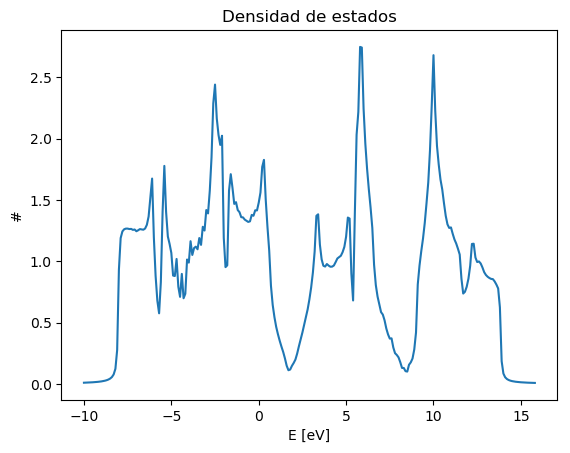

In [101]:
function DOS()
enh=-7.9:0.1:13.8; #Un intervalo adecuado para las energías, de acuerdo a la estructura de bandas
Enh=DOS.(enh);

#plot(enh,Enh/length(Enh))
plot(Enh/length(Enh),enh)

title("Densidad de estados")
ylabel("")
xlabel("DOS")
axis([-0.01, 3.3, -10, 15])    
end

enh=-10:0.1:15.8; #Un intervalo adecuado para las energías, de acuerdo a la estructura de bandas
Enh=DOS.(enh);

plot(enh,Enh/length(Enh))
title("Densidad de estados")
ylabel("#")
xlabel("E [eV]")
dos=plt.gcf()
dos.savefig("dos.png",dpi=100)

In [104]:
function DOS2(E) #joint density of states, #Definición de la DOS como sumas de lorentzianas
    
    D=0;
    for n=1:length(En)
    for lu=1:4 #Aquí se suma las ocho energías por punto
          for le=1:4
        
            
           D+=lor(E,En[n][le+4]-En[n][lu],1/20);
            
        end
      end
    end
    
    return D
end


DOS2 (generic function with 1 method)

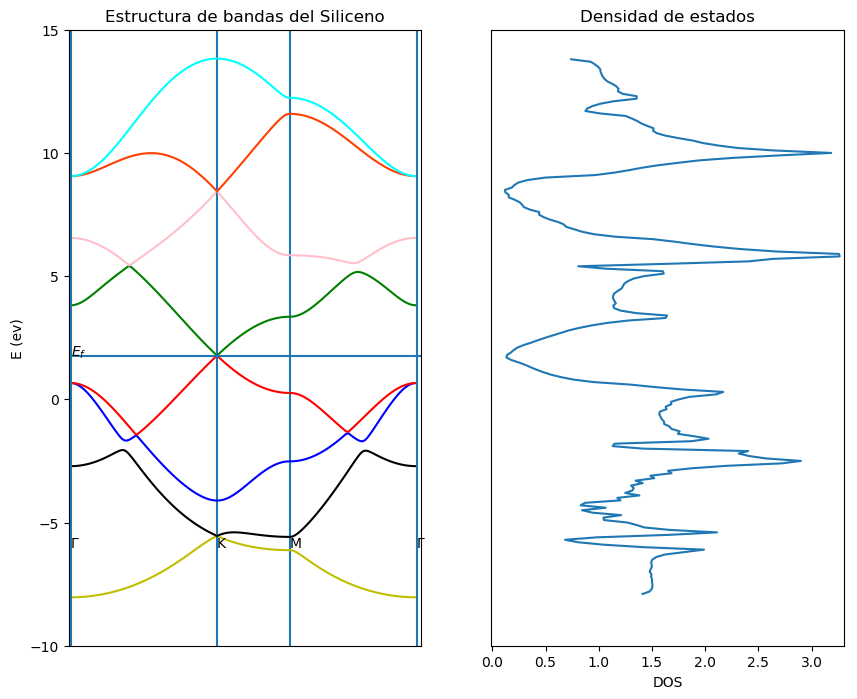

In [96]:
figure(figsize=(10, 8))
subplot(121)
BANDAS()


subplot(122)
yticks([])
DOS()
fig = plt.gcf();
fig.savefig("BANDAS2.png", dpi=100)

In [33]:

fig.savefig("BANDAS2.png", dpi=100)


# Densidad de estados conjunta

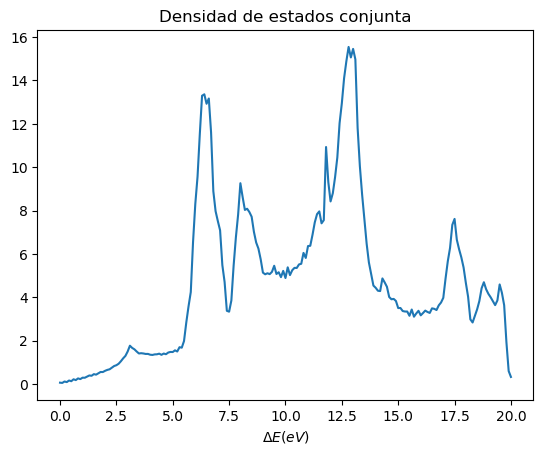

In [108]:

as=0:0.1:20


Enh2=DOS2.(as);

plot(as,Enh2/length(Enh2))

title("Densidad de estados conjunta")
xlabel(L"\Delta E (eV)")
fig2 = plt.gcf();

In [109]:
fig2.savefig("joint.png",dpi=100)

In [112]:
function derivada(kx,ky,kz,n,u1,u2,u3)
    #LA n denota a que eigen-valor le pertenece la derivada del eigen-vector y u1,u2,u3 direccion del campo E
    Δ=0.1
    if u1==u2 && u2==u3 && u1==0
    
    else 
        u1=u1/sqrt(u1^2+u2^2+u3^2)
        u2=u2/sqrt(u1^2+u2^2+u3^2)
        u3=u3/sqrt(u1^2+u2^2+u3^2)
    end

    ∇=zeros(Complex{Float64},8,3)
    DuVi=real(Vi(kx+Δ*u1,ky+Δ*u2,kz+Δ*u3)[1:8,n]-Vi(kx,ky,kz)[1:8,n])/Δ
    
    return DuVi
    
end

derivada (generic function with 1 method)

In [77]:
e_u=[0,0,1]#Direccion del campo magnetico
#dot(Vi(qx,qy,qz),derivada(kx,ky,kz,v))
val=1 #valencia 1-4
con=5 #conduccion 5-8
ε_2=0

for val=1:4, con=5:8,Kx=1:0.1:2,Ky=1:0.1:2,Kz=1:0.1:2
ε_2+=(dot(Vi(0,0,0)[1:8,con],derivada(0,0,0,val,e_u[1],e_u[2],e_u[3])))^2
end
println(ε_2)

7.62134721730891e-9


In [113]:
e=1.06217e-19;
h=6.626068e-34;

x=e/h;

In [115]:
vol=a1'cross(a2,a3)

38.71029631867986

In [114]:
dk=10.8/length(En)^2

2.8373258624091367e-6

# Absorción con matriz óptica


In [117]:
c(w)=8*pi^2 /(a1'cross(a2,a3)*w^2);
function εm(w)
En2=0
for n=0:0
for li=1:length(λ2)
    for lo=1:li
        for lu=1:4
           for le=1:4
                        
             En2+=((Vi(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[:,lu]'derivada(zb(lo,li,n)[1],zb(lo,li,n)[2],le+4,1,0,0,1))^2)*lor(w,-Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[lu]+Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[le+4],1/20)*dk
              end
            end
    end
end
end

for n=1:4
for li=2:length(λ2)
    for lo=2:li
    for lu=1:4
           for le=1:4
                        
             En2+=((Vi(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[:,lu]'derivada(zb(lo,li,n)[1],zb(lo,li,n)[2],le+4,1,0,0,1))^2)*lor(w,-Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[lu]+Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[le+4],1/20)*dk
              end
            end
    end
end
end
for n=5:5
for li=2:length(λ2)
    for lo=2:li-1
    for lu=1:4
           for le=1:4
                        
             En2+=((Vi(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[:,lu]'derivada(zb(lo,li,n)[1],zb(lo,li,n)[2],le+4,1,0,0,1))^2)*lor(w,-Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[lu]+Ei(zb(lo,li,n)[1],zb(lo,li,n)[2],0)[le+4],1/20)*dk
              end
            end
        
    end
end
end
    
    return c(w)*En2
end
# "En" es un arreglo de 611 vectores con 8 entradas cada uno

εm (generic function with 1 method)

In [118]:
de=0.25:0.25:10;
en=εm.(de);


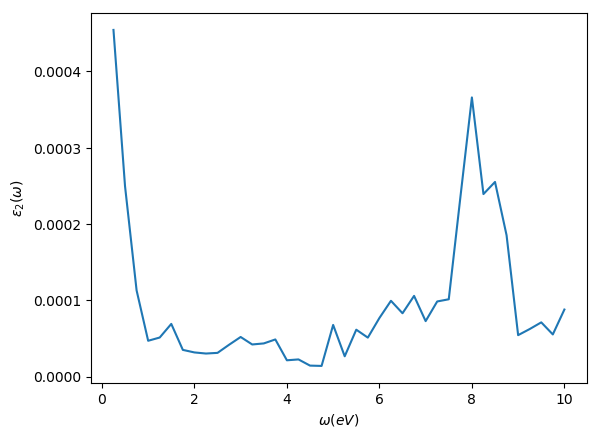

In [121]:
plot(de,en)
ylabel(L"\varepsilon_2(\omega)")
xlabel(L"\omega (eV)")

den=plt.gcf()
den.savefig("epsilon.png")

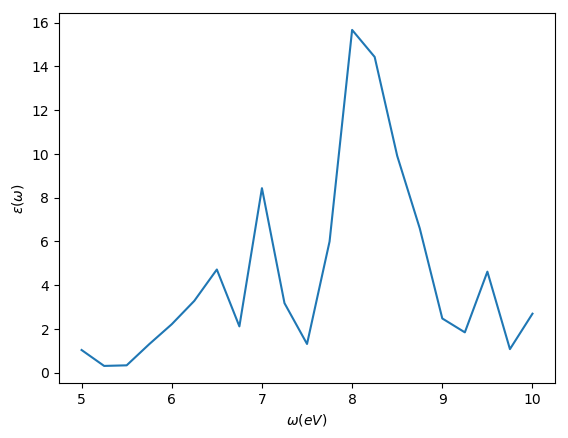

PyObject Text(0.5, 26.0, '$\\omega (eV)$')

In [45]:
de=5:0.25:10;
en=εm.(de);
plot(de,en)

den=plt.gcf()
ylabel(L"\epsilon(\omega)")
xlabel(L"\omega (eV)")


In [46]:
den.savefig("matop.png",dpi=100)

In [53]:
i=1im;
G2(h,k,l)=norm(h*b1+k*b2+l*b3);

S(h,k,l) =14*(exp( 2*pi*i*(h*s1[1]+k*s1[2]+l*s1[3]) )+exp( 2*pi*i*(h*s2[1]+k*s2[2]+l*s2[3])));

d(h,k,l)= 2*pi/G2(h,k,l);

Th(h,k,l)=real(asind(1.54/(2*d(h,k,l))));

So(h,k,l)=real(S(h,k,l)*conj(S(h,k,l)))

So (generic function with 1 method)

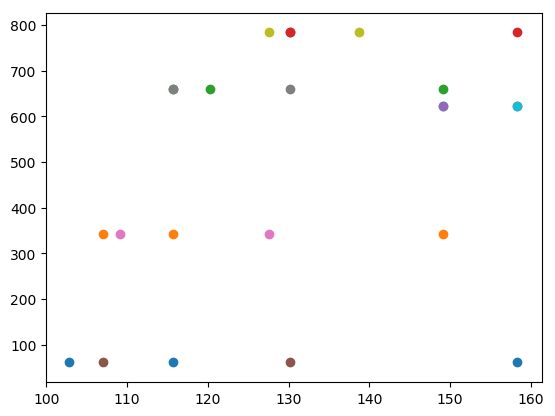

In [54]:
df=[]
for y =1:5
  for j=1:5
   for u=1:5
   if abs(1.54/(2*d(y,j,u))) <1
    scatter(2*Th(y,j,u),So(y,j,u))
                push!(df,[2*Th(y,j,u),So(y,j,u)])
    end     
            
    end
  end
end


In [35]:
df[1][1]

82.54229687888974

In [27]:
abs(1.54/(2*d(1,1,1)))

0.7813998875458704

In [25]:
d(1,2,3)

0.3316884073511508

In [37]:
function DOS3(x) #density of states, #Definición de la DOS como sumas de lorentzianas
    
    D=0;
    for n=1:length(df)
    
          
        
             D+=lor(x,df[n][1],1/20)*df[n][2]; 
        
      
    end
    
    return D
end


DOS3 (generic function with 1 method)

In [40]:
dfl=0:180;

efl=DOS3.(dfl);

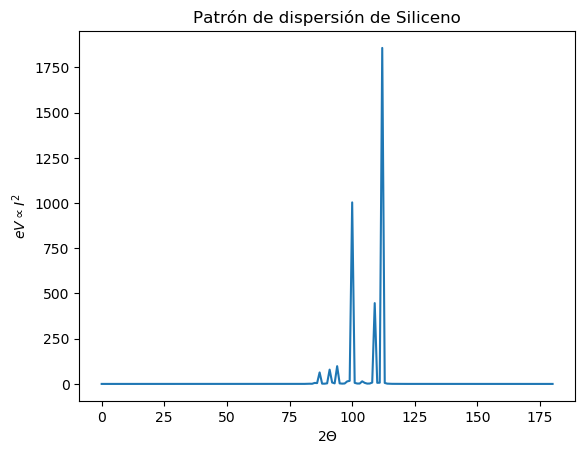

In [66]:

xlabel(L"2\Theta")
ylabel(L"eV \propto I^{2} "  )
title("Patrón de dispersión de Siliceno")
plot(dfl,efl)

den3=plt.gcf();

In [67]:
den3.savefig("dispersion.png",dpi=100)